## LOFAR ARTEMIS Pulse (wide feature model) Classifier

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Training Set Setup

#### Load Extracted Features

In [2]:
# Path to pickle of training features pandas dataframe
BASE_DATA_PATH = '/home/griffin/local/projects/LOFAR_Pulses/Data/' #ASLXLAP07
DF_PKL_FILE = 'FeatsDataFrame.pkl'
baseBufferPklFile = BASE_DATA_PATH + DF_PKL_FILE

In [3]:
# load baseBufferPkl
df = pd.read_pickle(baseBufferPklFile)

# create a label column with 'unlabbled' label
df = df.assign(Label=-1)

# create a predicted label column with 'unlabelled' label
df = df.assign(predictLabel=-1)

print(df.shape)

(4000, 408)


In [4]:
print(df.describe())
print(df.columns.values)

              Beam       BestDM        Block        DMmax       DMmean  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      4.423750    42.253101    25.737750    59.117025    43.424814   
std       2.356708    81.495334    56.213886   104.067764    79.416322   
min       1.000000     0.100000     1.000000     0.100000     0.100000   
25%       2.000000     2.500000     2.000000     3.000000     2.042230   
50%       4.000000     9.000000     8.000000     9.800000     9.150000   
75%       7.000000    28.650001    28.000000    54.150002    37.424268   
max       8.000000   631.400024  1011.000000   639.799988   503.154722   

          DMmedian        DMmin        Events  GaussianTestsksD  \
count  4000.000000  4000.000000  4.000000e+03       3970.000000   
mean     43.435413    27.051525  8.267112e+03          0.162154   
std      80.883400    58.809988  8.001675e+04          0.169902   
min       0.100000     0.000000  4.000000e+00          0.005282  

#### Add Labels

In [5]:
LABEL_PKL_FILE = 'artemisLabels_Set2_Jamie.pkl'
labelDict = pickle.load(open(BASE_DATA_PATH + LABEL_PKL_FILE, 'rb'))
print('Number of lables:', len(labelDict))
print('Unique set of labels:', set(labelDict.values()))

Number of lables: 4000
Unique set of labels: {'9', '3', 'a', '5', 's', '0', '8', '1', '6', '7', '4', '2'}


In [6]:
# Label string to integer map
labelStr2IntDict = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,
                    'a':10, 's':11}

for key,val in labelDict.items():
    df.loc[key, 'Label'] = labelStr2IntDict[val]

#### Labels

* 0 : Interesting, follow up
* 1 : 
* 2 : 
* 3 : 
* 4 : 
* 5 : 
* 6 : 
* 7 : 
* 8 : 
* 9 : 
* 10 : 
* 11 : 

In [7]:
print(df['Label'].value_counts()) # label counts

10    1164
9     1033
4      372
3      293
2      220
7      213
11     200
5      178
6      117
8       87
0       70
1       53
Name: Label, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b2b05b048>]],
      dtype=object)

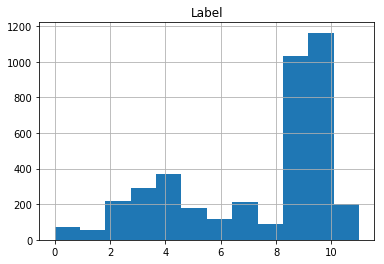

In [8]:
df.hist('Label', bins=len(df['Label'].unique()))

#### Compute MJD Features

We don't care about the absolute MJDs, but the relative offset within the dataset.

In [9]:
df['relMJDmax'] = df['MJDmax'] - df['MJDmin']
df['relMJDmean'] = df['MJDmean'] - df['MJDmin']
df['relMJDmedian'] = df['MJDmedian'] - df['MJDmin']

/home/griffin/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


#### Filter for only labelled data (i.e. Label > -1)

In [10]:
labelledDf = df[df['Label'] > -1].copy()

#### Select out the labels

In [11]:
labels = labelledDf['Label'].values

#### Sanity check

Make sure the features don't have extreme values

In [12]:
for col in labelledDf:
    if labelledDf[col].dtype == object: print(col, labelledDf[col].min(), labelledDf[col].max())
    else: print(col, labelledDf[col].min(), labelledDf[col].max(), labelledDf[col].std())

Beam 1 8 2.3567083943742446
BestDM 0.10000000149012 631.40002441406 81.49533362583011
Block 1 1011 56.21388596406848
DMmax 0.10000000149011999 639.79998779297 104.0677640961884
DMmean 0.10000000149011999 503.15472229242846 79.41632233410542
DMmedian 0.10000000149011999 619.0 80.88339978354475
DMmin 0.0 317.80001831055 58.80998766791617
Events 4 3026132 80016.7493272432
GaussianTestsksD 0.0052822115053891006 0.5406166487063576 0.16990227134086602
GaussianTestskspvalue 0.0 0.9999994330958465 0.31001376257865254
GaussianTestskurtosis -3.0 24409.000587580922 888.4496739066888
GaussianTestsskew -156.24020385742188 77.1719970703125 12.32963585990604
MJDStart 16767.498375356998 58202.037565258 2513.9588117647304
MJDmax 16767.49838992 58202.037590077 2513.9588129587873
MJDmean 16767.49838331881 58202.037589989784 2513.958813039324
MJDmedian 16767.498389192 58202.03759001599 2513.9588130125626
MJDmin 16767.498376813 58202.037589812004 2513.958812876995
MJDstd 0.0 3.0286356403652448e-05 4.623214

pixelsmin_0_0 -381054.46875 3810230.0 62517.09817866777
pixelsmin_0_1 -381054.46875 3810188.75 62516.542847362776
pixelsmin_0_2 -27262596.0 44.56153869628906 444670.59214937314
pixelsmin_0_3 -381054.46875 3810215.75 62517.17741217027
pixelsmin_10_0 -141424.109375 3810230.0 62252.6678592564
pixelsmin_10_1 -141424.109375 3810188.75 62252.114995694734
pixelsmin_10_2 -27262596.0 44.72956848144531 444580.29444649076
pixelsmin_10_3 -141424.109375 3810215.75 62252.8215053567
pixelsmin_11_0 -141424.109375 3810230.0 62248.23016531363
pixelsmin_11_1 -141424.109375 3810188.75 62247.681460710555
pixelsmin_11_2 -27262596.0 46.04081344604492 444580.19197223615
pixelsmin_11_3 -141424.109375 3810215.75 62248.39980371716
pixelsmin_12_0 -141424.109375 3810230.0 62246.71335070385
pixelsmin_12_1 -141424.109375 3810188.75 62249.85801767046
pixelsmin_12_2 -27262596.0 43.433773040771484 444580.0925173747
pixelsmin_12_3 -141424.109375 3810215.75 62246.88428927224
pixelsmin_13_0 -141566.140625 3810230.0 62250.

windDedispTimeSeriesstd14 0.0 180588240.0 3025730.044265977
windDedispTimeSeriesstd15 0.0 649447936.0 10327885.344115833
windDedispTimeSeriesstd2 0.0 3611191.5 64040.07236802393
windDedispTimeSeriesstd3 0.0 1072141.875 20058.42249794019
windDedispTimeSeriesstd4 0.0 5983301.0 101402.0014999105
windDedispTimeSeriesstd5 0.0 9163994.0 152109.1003944958
windDedispTimeSeriesstd6 0.0 11156419.0 205290.7547790657
windDedispTimeSeriesstd7 0.0 10946682.0 193168.1091590713
windDedispTimeSeriesstd8 0.0 2838168.75 57065.90983834227
windDedispTimeSeriesstd9 0.0 3615601.0 68642.16962536819
windTimeSeriesmax0 -91453072.0 94.86181640625 1481616.121956634
windTimeSeriesmax1 -91453072.0 262.3088684082031 1476954.9774772534
windTimeSeriesmax10 -33941788.0 265.2313537597656 614865.4232630489
windTimeSeriesmax11 -33941788.0 238.30093383789062 610319.1866614893
windTimeSeriesmax12 -33941788.0 113.506103515625 610319.2428812812
windTimeSeriesmax13 -21273512.0 1221632.75 444611.33770573634
windTimeSeriesmax14 

#### Drop Features that are not useful

In [13]:
featureDf = labelledDf.drop(['Block', 'Label', 'predictLabel'], axis=1)

### Pre-processing

Prepare the features for model building: outliers (inf, NaN) are replaced, the features are scaled to approximately zero mean, and unity variance.

In [14]:
import sklearn.preprocessing
import sklearn.impute

#### Convert feature dataframe to 2-D array of floats

In [15]:
featuresArr = featureDf.values.astype('float32')
featureNames = list(featureDf.columns.values)
preProcLabels = labels.copy()

In [16]:
featuresArr[featuresArr == -1. * np.inf] = np.nan
featuresArr[featuresArr == np.inf] = np.nan
print('NaN values in feature array:', featuresArr[featuresArr == np.nan])

imp = sklearn.impute.SimpleImputer(strategy='mean').fit(featuresArr)

preProcFeats = imp.transform(featuresArr)

NaN values in feature array: []


#### Scale Features

Robust scaling uses a median filter, this is better for non-Gaussian distributions

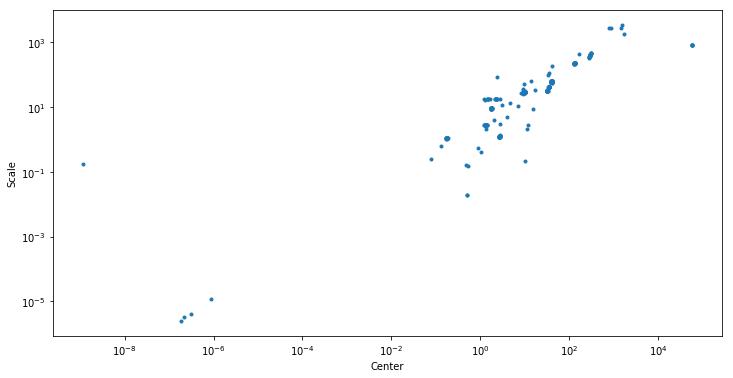

In [17]:
rScale = sklearn.preprocessing.RobustScaler().fit(preProcFeats)

plt.figure(figsize=(12, 6))
plt.loglog(rScale.center_, rScale.scale_, '.')
#plt.plot(rScale.center_, rScale.scale_, '.')
#for fnid, fName in enumerate(featureNames): plt.text(rScale.center_[fnid], rScale.scale_[fnid], fName)
plt.xlabel('Center')
plt.ylabel('Scale')

preProcFeats = rScale.transform(preProcFeats)

### Train Classifier Model

In [18]:
import sklearn.ensemble
import sklearn.multiclass
import sklearn.model_selection

#### Validation

Stratified k-fold cross validation

In [19]:
k_fold = sklearn.model_selection.StratifiedKFold(n_splits=3, shuffle=True)

#### Classifier Model

One vs. Rest : Random Forest

In [20]:
clf = sklearn.multiclass.OneVsRestClassifier(sklearn.ensemble.RandomForestClassifier(n_estimators=80))

In [21]:
clf.fit(preProcFeats, preProcLabels)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=None)

### Classifier Model Analysis

#### Model Scoring : Confusion Matrix

In [22]:
print(sklearn.model_selection.cross_val_score(clf, preProcFeats, preProcLabels,\
                                              cv=k_fold, n_jobs=-1, scoring='neg_log_loss'))


# Train/Test Validation
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(preProcFeats,\
                                                            preProcLabels, test_size=0.25, random_state=0)
predictTestX = clf.fit(X_train, y_train).predict_proba(X_test)
confuseMatrix = sklearn.metrics.confusion_matrix(y_test, clf.fit(X_train, y_train).predict(X_test))

[-0.5908349  -0.54817537 -0.54258977]


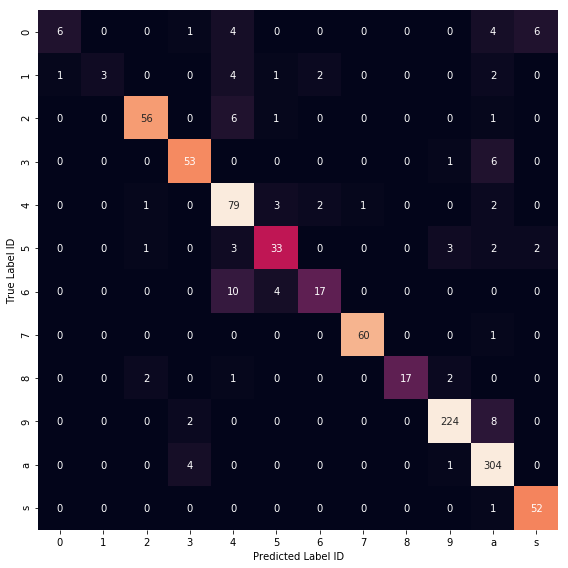

In [23]:
classLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 's']

normConfuseMatrix = np.zeros(confuseMatrix.shape)
for col in np.arange(confuseMatrix.shape[1]):
    normConfuseMatrix[:,col] = confuseMatrix[:,col] / float(confuseMatrix[:,col].max())
    
dfCM = pd.DataFrame(confuseMatrix, index = [i for i in classLabels], columns = [i for i in classLabels])

fig = plt.figure(figsize=(8,8)) # (width, height)
sns.heatmap(dfCM, annot=True, vmin=0, vmax=70, fmt='d', cbar=False)
#sns.heatmap(dfCM, annot=True, cbar=False)
plt.xlabel('Predicted Label ID')
plt.ylabel('True Label ID')

plt.tight_layout()

#### Feature Importance

In [24]:
fitModel = clf.fit(preProcFeats, preProcLabels)

0 DMmedian 0.015581468893448403
1 pixelsmax_4_0 0.010228746071569043
2 pixelsmax_6_0 0.02317390297765968
3 MJDmin 0.048377334523883514
4 globalDedispTimeStatsstd 0.03669308803665163
5 globalDedispTimeStatsmax 0.061964290063890856
6 globalDedispTimeStatsnegPct 0.02041872208781083
7 globalDedispTimeStatsmin 0.09209135140475677
8 pixelsmin_12_0 0.03393242310231434
9 DMmedian 0.08958037830604525
a DMmedian 0.075101378969909
s DMmin 0.05457918155720807


Text(0.5, 0, 'Feature ID')

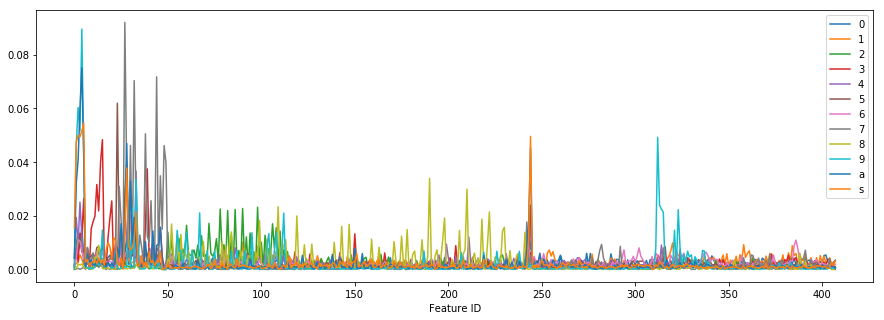

In [25]:
fig = plt.figure(figsize=(15,5)) # (width, height)
for idx in np.arange(len(fitModel.estimators_)):
    maxFeatVal = fitModel.estimators_[idx].feature_importances_.max()
    plt.plot(fitModel.estimators_[idx].feature_importances_, label=classLabels[idx])
    print(classLabels[idx], featureNames[np.argmax(fitModel.estimators_[idx].feature_importances_)], maxFeatVal)

plt.legend()
plt.xlabel('Feature ID')

### Apply Classifier

---

To Do:

* Apply classifier to larger data set, and check results

Ideas:

* feature: ratio of DM std / DM max
* ensemble of classifiers
* multi-class: one vs. rest
* hyper-parameter grid search
* probablistic prediction analysis